In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_AG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,NaN,NaN,NaN,NaN,0.0,33.6,0.627,50.0
1,1.0,85.0,NaN,29.0,0.0,NaN,NaN,NaN
2,8.0,183.0,NaN,0.0,0.0,NaN,NaN,NaN
3,1.0,89.0,NaN,NaN,NaN,28.1,0.167,NaN
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	38
float64		column 2	114
float64		column 3	190
float64		column 4	152
float64		column 5	190
float64		column 6	190
float64		column 7	76
float64		column 8	266


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,730.000000,654.000000,578.000000,616.000000,578.000000,578.000000,692.000000,502.000000
mean,3.791781,120.724771,70.401384,20.988636,79.468858,31.831488,0.475611,33.310757
std,3.369831,32.090141,17.557180,16.150155,112.131638,7.471279,0.331260,11.542642
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,31.600000,0.374500,29.000000
75%,6.000000,140.000000,80.000000,33.000000,129.750000,36.300000,0.637000,40.750000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.329000,72.000000


<AxesSubplot:>

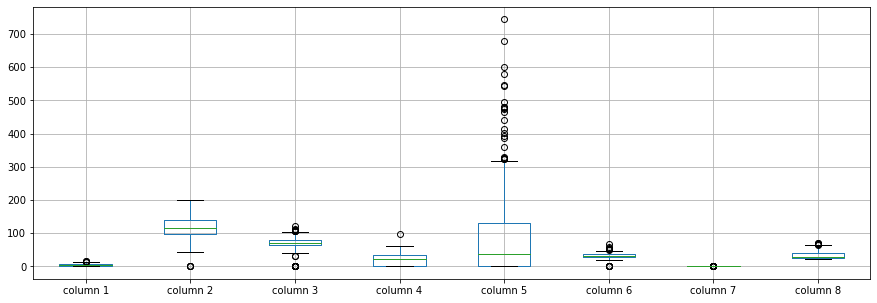

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.791781
column 2    120.724771
column 3     70.401384
column 4     20.988636
column 5     79.468858
column 6     31.831488
column 7      0.475611
column 8     33.310757
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.104127,0.198248,-0.080578,-0.101112,0.044670,-0.022101,0.544132
column 2,0.104127,1.000000,0.145101,0.058383,0.297202,0.173785,0.124281,0.251452
column 3,0.198248,0.145101,1.000000,0.112702,0.039375,0.147958,-0.006631,0.253437
column 4,-0.080578,0.058383,0.112702,1.000000,0.434759,0.411944,0.171261,-0.144796
column 5,-0.101112,0.297202,0.039375,0.434759,1.000000,0.183275,0.218083,-0.088897
column 6,0.044670,0.173785,0.147958,0.411944,0.183275,1.000000,0.117145,-0.026091
column 7,-0.022101,0.124281,-0.006631,0.171261,0.218083,0.117145,1.000000,0.052820
column 8,0.544132,0.251452,0.253437,-0.144796,-0.088897,-0.026091,0.052820,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [8,8+10,8+10+10,8+10+10+10,8+10+10+10+10,8+10+10+10+10+10,8+10+10+10+10,8+10+10+10,8+10+10,8+10,8], vae_layer = False, seed = 10)
imputer.build_model(df)
imputer.train_model(training_epochs=150)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 330.3196938832601
Epoch: 1 , loss: 329.61044947306317
Epoch: 2 , loss: 331.6763270696004
Epoch: 3 , loss: 332.1066182454427
Epoch: 4 , loss: 330.4586006800334
Epoch: 5 , loss: 330.2091929117839
Epoch: 6 , loss: 329.7046095530192
Epoch: 7 , loss: 330.2852252324422
Epoch: 8 , loss: 331.2641248703003
Epoch: 9 , loss: 329.5316740671794
Epoch: 10 , loss: 328.0110390981038
Epoch: 11 , loss: 329.5835208892822
Epoch: 12 , loss: 328.35381476084393
Epoch: 13 , loss: 325.5528154373169
Epoch: 14 , loss: 320.330189704895
Epoch: 15 , loss: 312.70338408152264
Epoch: 16 , loss: 299.1644579569499
Epoch: 17 , loss: 290.2187280654907
Epoch: 18 , loss: 286.0278704961141
Epoch: 19 , loss: 285.0111770629883
Epoch: 20 , loss: 281.7317832310994
Epoch: 21 , loss: 277.2292709350586
Epoch: 22 , loss: 276.65937487284344
Epoch: 23 , loss: 276.2387580871582
Epoch: 24 , loss: 278.54069169362384
Epoch: 25 , loss: 275.04403591156006
Ep

In [22]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [23]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000000
column 2     0.088237
column 3    84.000000
column 4     0.087898
column 5     0.086469
column 6    35.400000
column 7     0.388000
column 8     0.087518
Name: 21, dtype: float64

In [24]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [25]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,-5.908251,-147.909135,-71.909424,-34.909484,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,-65.900466,0.000000,0.000000,-26.500158,-0.246572,-30.900911
2,0.000000,0.000000,-63.911567,0.000000,0.000000,-23.211315,-0.579899,-31.911864
3,0.000000,0.000000,-65.910132,-22.910220,-93.911771,0.000000,0.000000,-20.910430
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
764,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [26]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [27]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [28]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(2740.9507569231714, 5776.576248839705)

In [29]:
NRMS=numerator/denominator
NRMS


0.4744939976294305

In [30]:
new_df.iloc[66,:]

column 1      0.000000
column 2    109.000000
column 3      0.122280
column 4     30.000000
column 5      0.000000
column 6      0.122784
column 7      0.129990
column 8      0.121765
Name: 66, dtype: float64

In [31]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.091749,0.090865,0.090576,0.090516,0.000000,33.600000,0.627000,50.000000
1,1.000000,85.000000,0.099534,29.000000,0.000000,0.099842,0.104428,0.099089
2,8.000000,183.000000,0.088433,0.000000,0.000000,0.088685,0.092101,0.088136
3,1.000000,89.000000,0.089868,0.089780,0.088229,28.100000,0.167000,0.089570
4,0.000000,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33.000000
...,...,...,...,...,...,...,...,...
763,10.000000,101.000000,76.000000,48.000000,180.000000,32.900000,0.171000,63.000000
764,2.000000,122.000000,70.000000,27.000000,0.000000,36.800000,0.340000,27.000000
765,5.000000,121.000000,72.000000,23.000000,112.000000,26.200000,0.245000,30.000000
766,1.000000,126.000000,60.000000,0.000000,0.000000,30.100000,0.349000,47.000000


In [20]:
imputations[-1].to_excel("PID_AG_20.xlsx", index=False, header=False)